In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_svmlight_file
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [6]:
X, y = load_svmlight_file('features_gray_scale.txt')

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.5, random_state = 5)

scaler = preprocessing.MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [8]:
print("Accuracy: ", knn.score(X_test, y_test) * 100, '%')

Accuracy:  92.9 %


In [9]:
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)),
      "\nTest set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.95 
Test set score: 0.93


In [10]:
# find best number (N) of neighbors
param_grid = {'n_neighbors':[3,5,7,9,11]}
grid_search = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid)
grid_search.fit(X_train, y_train)
neighbors = grid_search.best_estimator_.n_neighbors
print('Best number of neighbors: ' + str(neighbors))

Best number of neighbors: 3


Maximum accuracy:- 0.932 at K = 0


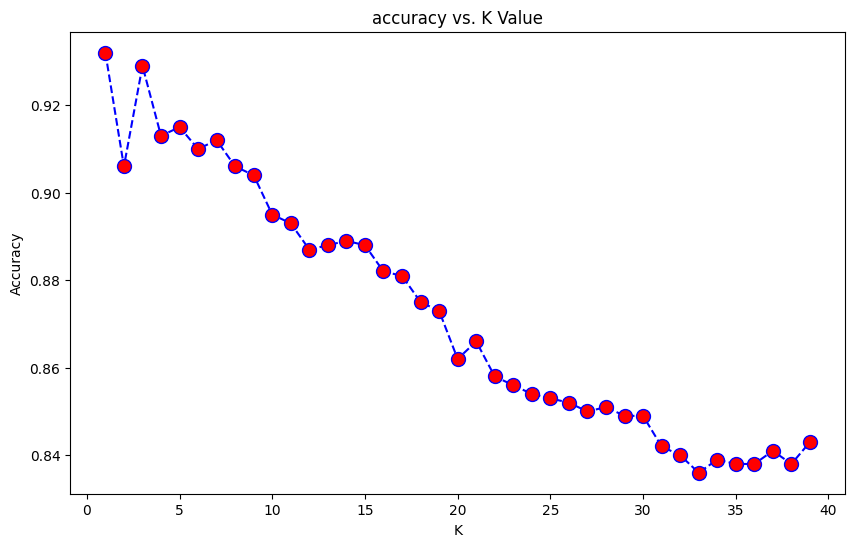

In [11]:
acc = []
# Will take some time

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [16]:
cm = confusion_matrix(y_test, knn.predict(X_test))

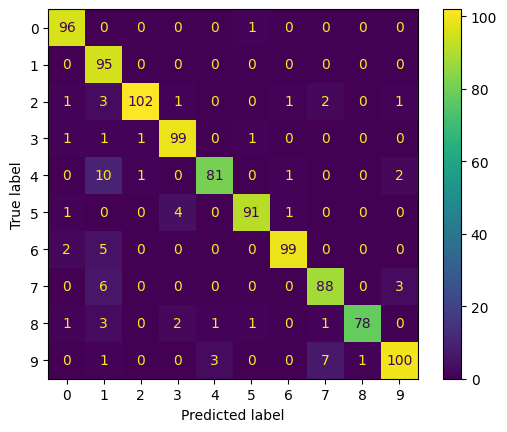

In [17]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show() 

In [18]:
print(cm[0][0])

96
